# In this notebook, I will analyse the loan data.
# Using plots and statistics, we shall find the important features from this data

### Imports

In [1]:
import pandas as pd
# To read csv
import matplotlib.pyplot as plt
# For plotting
import seaborn as sns
# Plotting helper library
import numpy as np
# For mathematical functions
%matplotlib inline
# To allow plotting inside the notebook
import warnings
warnings.filterwarnings("ignore")
# To ignore deprecation warnings

### Reading the file

In [2]:
df=pd.read_csv("loan.csv", low_memory=False)
# Reading the data, low_memory=False as the file is very large
print(df.shape)
df.head()
# Shows the first 5 rows of the data

(887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysing the data

### Loan applied for vs amount funded

Text(0.5,1,'Amount Funded by the Lender')

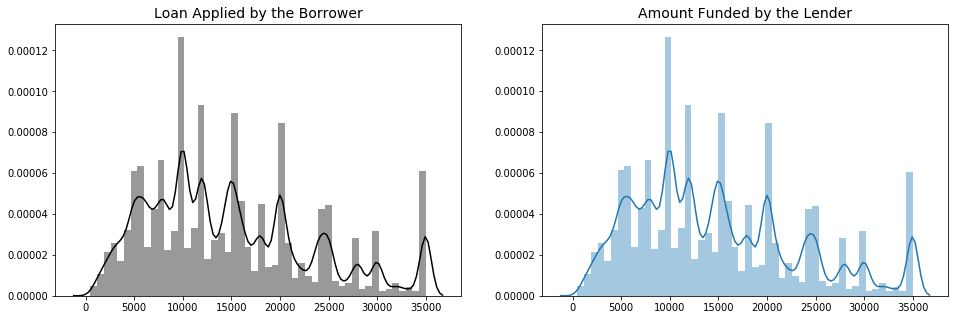

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
# Making a plot with 2 subplots

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values


sns.distplot(loan_amount, ax=ax[0], color='#000000')
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1])
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
# Distribution plots

# Loan applied for and loan funded have same distribution, meaning most loans were accepted

### Loan amount distribution

Mean loan amount is:  14755.26460508982


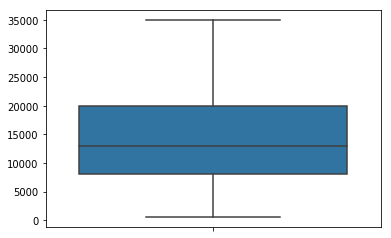

In [20]:
sns.boxplot(y=loan_amount)
print "Mean loan amount is: ",loan_amount.mean()
# Most loans were between 10000 and 20000 dollars

### Loan status distribution

Loan Statuses Counts


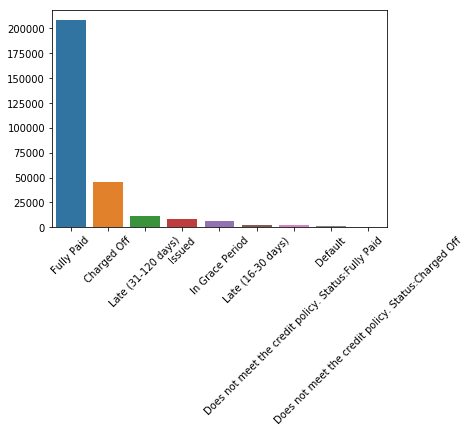

In [5]:
status_counts = df.loan_status.value_counts()[1:]
# Removing current loans as they will not be useful for our analysis
ax = sns.barplot(status_counts.index, status_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Loan Statuses Counts")

### Number of loans issued over 2007- 2015

Number of loans issued yearwise


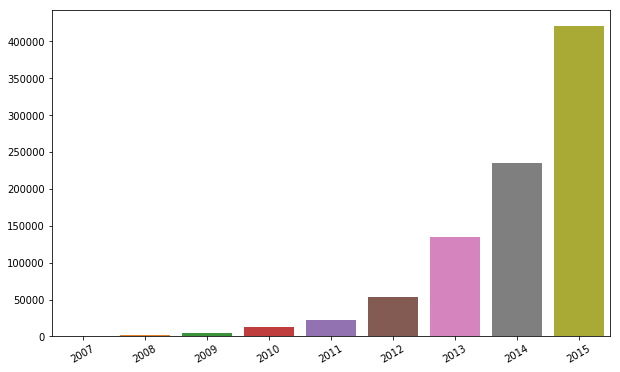

In [6]:
years = pd.to_datetime(df.issue_d)
# Converting the issue date column to datetime format for easy parsing
df["year"] = years.dt.year
# Taking only year from the issue date column and creating a new column
yearwise_loans = df.year.value_counts()
# Plotting the number of loans taken yearwise

plt.figure(figsize=(10,6))
ax = sns.barplot(yearwise_loans.index, yearwise_loans.values)
# Making a seaborn barplot
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
print("Number of loans issued yearwise")
# Exponential growth in number of loans issued YoY

### Average loan amount issued over the years 2007- 2015

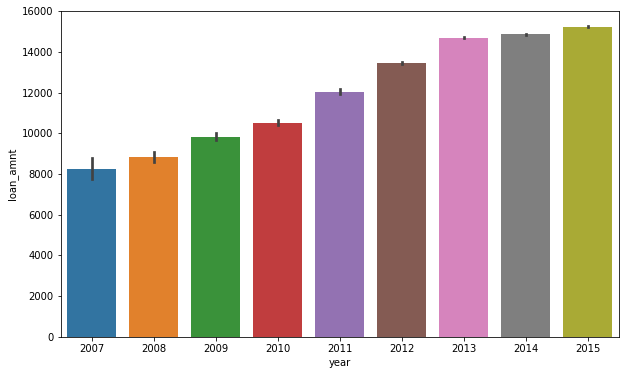

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(df.year, df.loan_amnt)
# PLotting a bar plot of average loan issued
# Average loan issued also increased YoY

### What percent of the loans were bad loans?

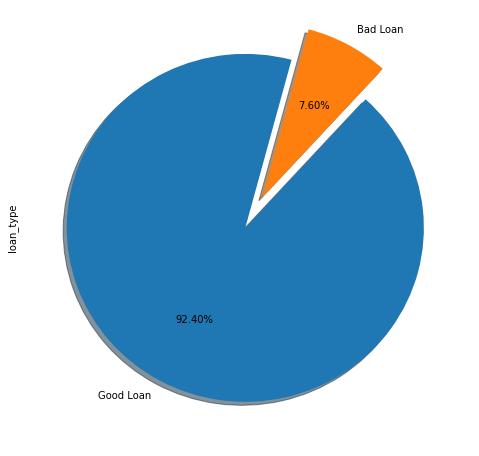

In [21]:
# Bad Loans analysis

# Various types of bad loans
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]

# Creating an empty column to store the laon type
df['loan_type'] = np.nan

# Function to set the loan type
def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
# Applying the function to all the statuses    
df['loan_type'] = df['loan_status'].apply(loan_type)

# Making a pie chart of good loans and bad loans
plt.figure(figsize=(8,8))
df.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75)
# 7.6% of all loans were bad loans

### Yearwise correlation of loan amount and loan type

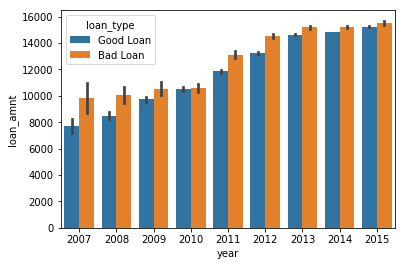

In [9]:
# General trend of higher loan amount implying higher chances of bad loan
sns.barplot(x=df.year, y=df.loan_amnt, hue=df.loan_type)
# Plotted yearwise

### Statewise bad loan rates calculation

<BarContainer object of 51 artists>

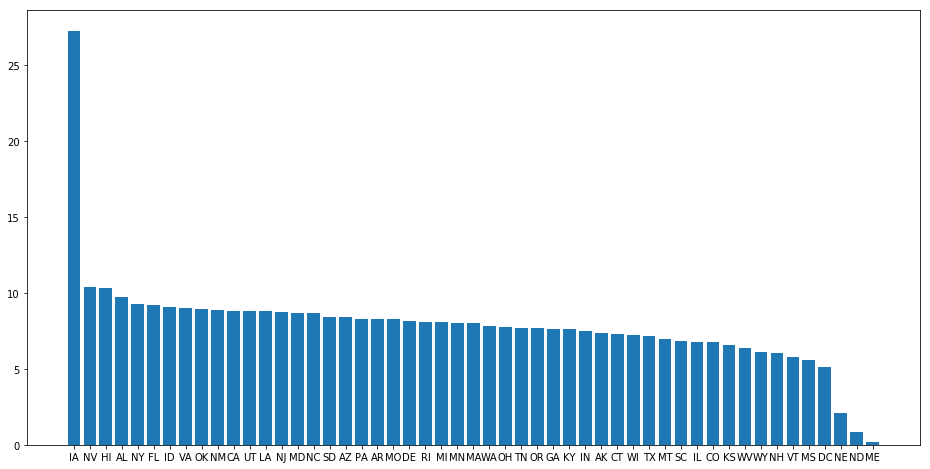

In [10]:
# Finding bad loan rate statewise
# Making a dictionary of ratio of bad loans to good loans
d = {}
for state in df['addr_state'].unique():
    values = df[df['addr_state']==state].loan_type.value_counts()
# Taking value counts of good and bad loans and finding the ratio
# Rounding off to second decimal
    d[state] = round(float(values[1])/float(values[0])*100,2)
    
# Sorting the created dictionary by the ratio, in descending order
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True) 
x, y = zip(*sorted_d) 

# Plotting the bad loan rates, statewise
plt.figure(figsize=(16,8))
plt.bar(x,y)
# Iowa has very high default rate (number of loans is relatively low as well)
# Safest states are Nebraska, North Dakota and Maine

### Mean loan amount over the years 2007- 2015 grouped by credit score grade

LOANS ISSUED, GROUPED BY CREDIT SCORE


<Figure size 1440x504 with 0 Axes>

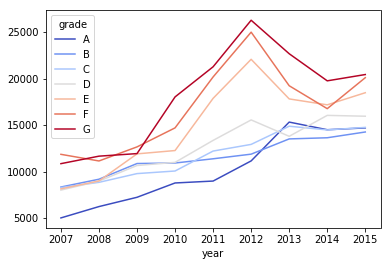

In [11]:
# Grouping the data by year and grade and mean loan amount
# G is the worst grade, A is the best
# Creating a colormap for the plot
cmap = plt.cm.coolwarm
plt.figure(figsize=(20,7))

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(colormap=cmap)
print("LOANS ISSUED, GROUPED BY CREDIT SCORE")

### Interest rates over the years 2007- 2015 grouped by interest rates

INTEREST RATES GROUPED BY CREDIT SCORE


<Figure size 1440x720 with 0 Axes>

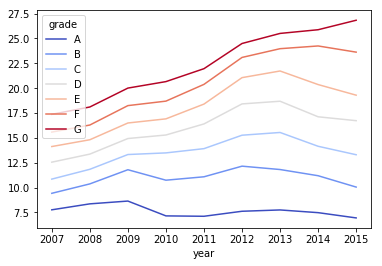

In [12]:
# To plot interest rates grouped by credit score grade

plt.figure(figsize=(20,10))
cmap = plt.cm.coolwarm

by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(colormap=cmap)
print("INTEREST RATES GROUPED BY CREDIT SCORE")

### Interest rate distribution by credit grade.
#### We can see that worse grades have a substantially higher interest rate

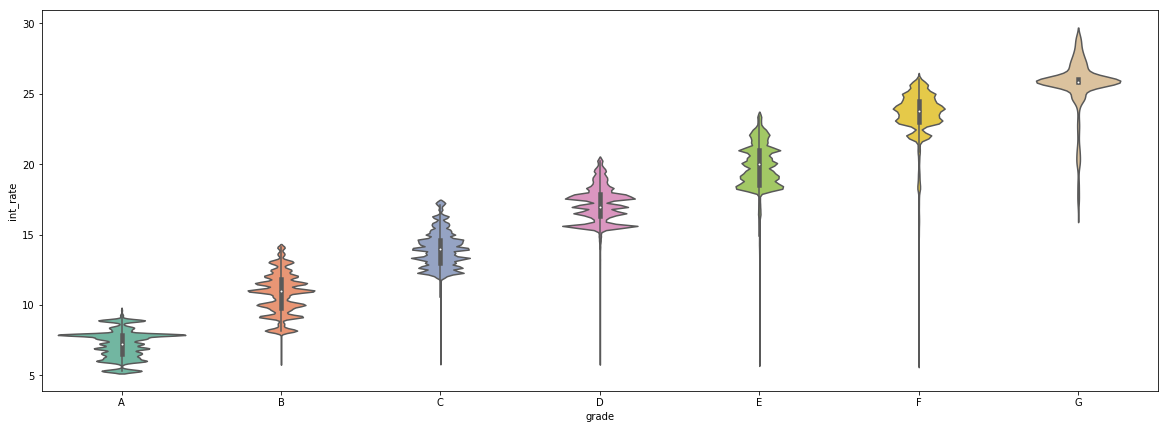

In [13]:
# Interest rate distribution by credit grade (not yearwise)
plt.figure(figsize=(20,7))
sns.violinplot(x='grade', y='int_rate', data=df, palette = "Set2", order=['A','B','C','D','E','F','G'])

### Bad loan rates grouped by loan purpose

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

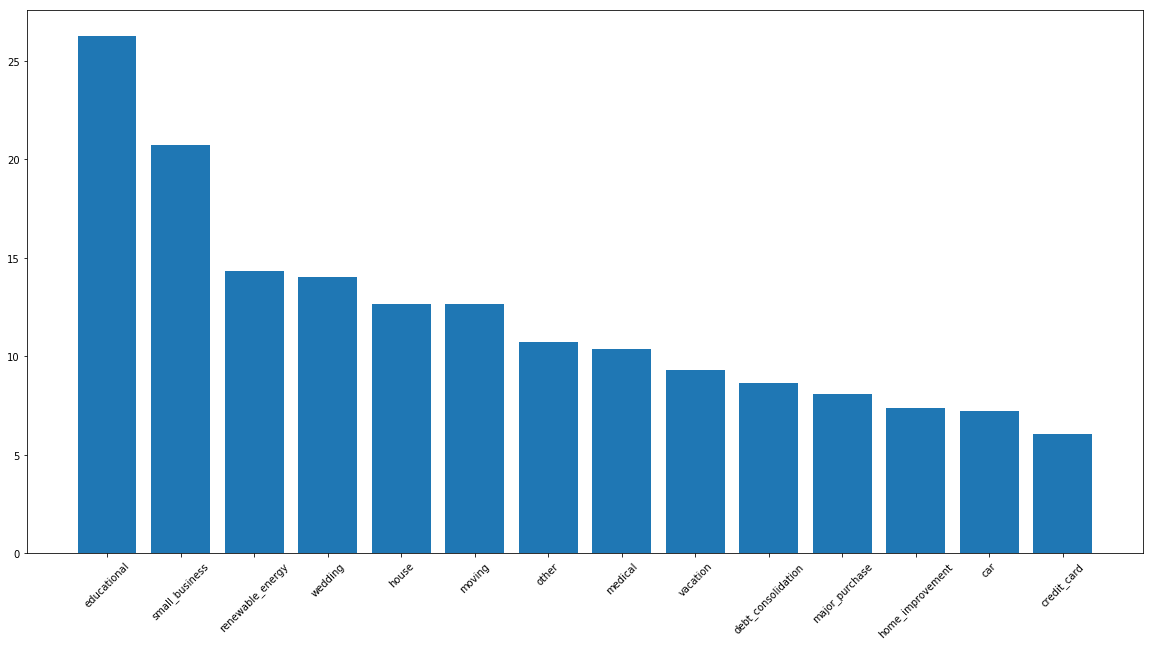

In [14]:
# Bad loan rates by purpose of loan

# Creating a dictionary to store bad loans percentages with purpose as keys

d = {}
for purpose in df.purpose.unique():
    values = df[df['purpose']==purpose].loan_type.value_counts()
    d[purpose] = round(float(values[1])/float(values[0])*100,2)

# Sorting the dictionary by bad loan percentages in descending values
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True) 
x, y = zip(*sorted_d)
# Plotting the data
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=45)

# Data exploration completed. 